In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
training_df = pd.read_csv('data/training_set.csv')
training_metadata_df = pd.read_csv('data/training_set_metadata.csv')
test_metadata_df = pd.read_csv('data/plasticc_test_metadata_unblinded.csv')

In [103]:
test_metadata_df[:500]

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,13,34.4531,-5.2295,1,0.305,0.319,0.054,41.112,0.019,0,...,0.0,0.000,60499.461,124,0.0,0.0,0.0,0.0,0.0,0.0
1,14,33.3984,-4.3311,1,-9.000,0.632,0.018,42.877,0.018,0,...,0.0,0.000,59792.121,120,0.0,0.0,0.0,0.0,0.0,0.0
2,17,348.5294,-61.7554,1,-9.000,0.830,0.060,43.600,0.016,0,...,0.0,0.000,60543.566,85,0.0,0.0,0.0,0.0,0.0,0.0
3,23,34.8047,-5.8292,1,-9.000,0.653,0.148,42.964,0.023,0,...,0.0,0.000,60137.480,97,0.0,0.0,0.0,0.0,0.0,0.0
4,34,351.3214,-64.1987,1,0.456,0.462,0.012,42.054,0.023,0,...,0.0,0.000,60245.078,68,0.0,0.0,0.0,0.0,0.0,0.0
5,35,35.3320,-5.9792,1,-9.000,0.839,0.038,43.629,0.022,0,...,0.0,0.000,60557.289,61,0.0,0.0,0.0,0.0,0.0,0.0
6,43,0.5745,-45.9811,1,-9.000,0.667,0.055,43.019,0.006,0,...,3.1,0.132,59913.246,130,0.0,0.0,0.0,0.0,0.0,0.0
7,50,0.5745,-45.9811,1,-9.000,1.466,0.053,45.128,0.006,0,...,0.0,0.000,59891.719,130,0.0,0.0,0.0,0.0,0.0,0.0
8,60,346.5625,-63.4483,1,-9.000,0.946,0.012,43.952,0.021,0,...,0.0,0.000,60574.031,58,0.0,0.0,0.0,0.0,0.0,0.0
9,69,349.1606,-64.7609,1,-9.000,1.043,0.109,44.214,0.020,0,...,0.0,0.000,60536.945,50,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
obj_ids = np.unique(training_df.object_id)

/Users/neilbassett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


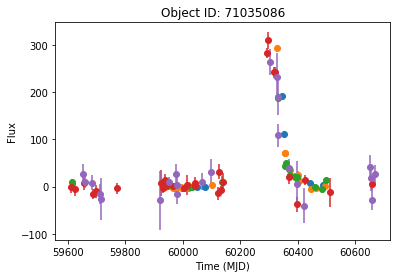

In [92]:
obj_id = np.random.choice(obj_ids)
obj = training_df[training_df.object_id == obj_id]
for passband in np.arange(1, 6):
    plt.errorbar(obj[training_df.passband == passband].mjd, obj[training_df.passband == passband].flux,\
                 yerr=obj[training_df.passband == passband].flux_err, fmt='o')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux')
plt.title('Object ID: %i' % obj_id)
plt.show()

# Random selection baseline

In [93]:
classes = np.unique(test_metadata_df['true_target'])

In [99]:
pred = np.random.choice(classes, size=len(test_metadata_df))
acc = np.sum(test_metadata_df['true_target'] == pred)/len(pred)
print('Accuracy = %.4f' % acc)

Accuracy = 0.0555


# Galactic/Extragalactic baseline

In [104]:
galactic_cut = test_metadata_df['hostgal_photoz'] == 0
galactic_objs = test_metadata_df[galactic_cut]
extragalactic_objs = test_metadata_df[~galactic_cut]

In [105]:
for target in classes:
    galactic_frac = np.sum(galactic_objs['true_target'] == target)/np.sum(test_metadata_df['true_target'] == target)
    extragalactic_frac = np.sum(extragalactic_objs['true_target'] == target)/np.sum(test_metadata_df['true_target'] == target)
    print('class = %s' % target)
    print('Galactic fraction = %.4f' % galactic_frac)
    print('Extragalactic fraction = %.4f\n' % extragalactic_frac)

class = 6
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 15
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 16
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 42
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 52
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 53
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 62
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 64
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 65
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 67
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 88
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 90
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 92
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 95
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class =

In [113]:
galactic_classes = np.array([6, 16, 53, 65, 92])
extragalactic_classes = np.array([15, 42, 52, 62, 64, 67, 88, 90, 95])

In [115]:
galactic_pred = np.random.choice(galactic_classes, size=len(galactic_objs))
extragalactic_pred = np.random.choice(extragalactic_classes, size=len(extragalactic_objs))
acc = (np.sum(galactic_objs['true_target'] == galactic_pred) + np.sum(extragalactic_objs['true_target'] == extragalactic_pred))/(len(galactic_pred) + len(extragalactic_pred))
print('Accuracy = %.4f' % acc)

Accuracy = 0.1205
